In [37]:
#import pycaret
import pandas as pd
import os
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from pycaret.anomaly import *
from collections import defaultdict

import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
#https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

In [107]:
filePath=".//data//"
fileName="data_sample.csv"
resultPath=".//results//"

def readData():
    df1 = pd.read_csv(filePath + fileName)
    df1=df1.dropna()
    print("\n\t shape2:", df1.shape)
    return df1

df1=readData()
print("\n\t shape: df2:",df1.shape)


	 shape2: (106746, 3)

	 shape: df2: (106746, 3)


In [39]:
#Import libraries
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [63]:
'''
    only consider wind_speed and wind_angle for prediction
'''
train, test = train_test_split(df1, test_size=0.05, shuffle=False)

#x = df1.iloc[:, [1,2]].values

x = df1.iloc[:, [1,2]]
print("\n\t x:",x.shape)


	 x: (106746, 2)


In [41]:
'''
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
kmeans5.cluster_centers_
'''

'\nkmeans5 = KMeans(n_clusters=5)\ny_kmeans5 = kmeans5.fit_predict(x)\nprint(y_kmeans5)\nkmeans5.cluster_centers_\n'

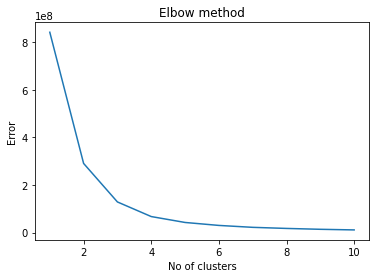

In [64]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [76]:
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(train.iloc[:, [1,2]].values)
#y_kmeans4 = kmeans4.fit_predict(x.values)
print(y_kmeans4)

kmeans4.cluster_centers_

[0 0 0 ... 0 1 0]


array([[  4.74899424, 153.57154567],
       [  5.11874554, 229.85175673],
       [  4.48522871, 314.6853327 ],
       [  3.76960235,  46.76492008]])

In [77]:
'''
    from elbow plot it is clear that k=4 are optimal clusters
    
    Now calculate each points distance from assigned cluster
'''

print(kmeans4.cluster_centers_)
#kmeans4.cluster_centers_[2][1]
print("\n\t no of alloted cluster points:",len(y_kmeans4))
print("\n\t no of alloted cluster points:",train.shape)

[[  4.74899424 153.57154567]
 [  5.11874554 229.85175673]
 [  4.48522871 314.6853327 ]
 [  3.76960235  46.76492008]]

	 no of alloted cluster points: 101408

	 no of alloted cluster points: (101408, 3)


In [110]:
'''
    calculate distance
'''
from collections import defaultdict
import statistics 
from statistics import mean

clusterPoints=defaultdict(list)
clusterDist=defaultdict(list)
centrePointDist=defaultdict(list)

def calCulateDistance(df,clusters,cluster_centers):
    
    exceptionCount=0
    cx1,cy1=cluster_centers[0][0],cluster_centers[0][1] 
    cx2,cy2=cluster_centers[1][0],cluster_centers[1][1] 
    cx3,cy3=cluster_centers[2][0],cluster_centers[2][1] 
    cx4,cy4=cluster_centers[3][0],cluster_centers[3][1] 
    
    print("\n\t cluster centres cx1:",cx1,"\t cy1:",cy1)
            
    for indx,row in df.iterrows():
        
        try:
            #print("\n\t indx:",indx)
            #centreID=clusters[indx]
            #print("\n\t row:\n",row)
            x,y=df.loc[indx,"wind_speed"],df.loc[indx,"wind_direction"]
            #print("\n\t x:",x,"\t y:",y)
            #print("\n\t centreID=",centreID)
            
            distance1=((cx1-x)**2+(cy1-y)**2)**0.5
            distance2=((cx2-x)**2+(cy2-y)**2)**0.5
            distance3=((cx3-x)**2+(cy3-y)**2)**0.5
            distance4=((cx4-x)**2+(cy4-y)**2)**0.5
            #print("\n\t x:",x,"\t y:",y,"\t distance=",distance)
            
            minDist=min(distance1,distance2,distance3,distance4)
            
            if minDist==distance1:
                cx,cy=cx1,cy1
                centreID=1
            elif  minDist==distance2:
                cx,cy=cx2,cy2
                centreID=2
            elif  minDist==distance3:
                cx,cy=cx3,cy3
                centreID=3
            elif  minDist==distance4:
                cx,cy=cx4,cy4
                centreID=4
                
            clusterDist[centreID].append(minDist)# distances of point clusterwise
            clusterPoints[(x,y)].append(centreID)# cluster id for each cluster
            centrePointDist[(x,y)]=minDist # minimum dist
            
        except Exception as e:
            print("\n\t indx:",indx,"\t e:",e)
            exceptionCount+=1
    print("\n\t exceptionCount:",exceptionCount)  
    
    m1,s1=0,0
    m2,s2=0,0
    m3,s3=0,0
    m4,s5=0,0
    
    
    #res = statistics.pstdev(test_list) 
    m1=mean(clusterDist[1])
    m2=mean(clusterDist[2])    
    m3=mean(clusterDist[3])
    m4=mean(clusterDist[4])
        
    s1=statistics.pstdev(clusterDist[1])
    s2=statistics.pstdev(clusterDist[2])    
    s3=statistics.pstdev(clusterDist[3])
    s4=statistics.pstdev(clusterDist[4])
    
    threshold=[m1+2*s1,m2+2*s2,m3+2*s3,m4+2*s4]
    threshold1=[m1-2*s1,m2-2*s2,m3-2*s3,m4-2*s4]
    
    print("\n\t m1:",m1)
    print("\n\t s1:",s1)
    
    print("\n\t m2:",m2)
    print("\n\t s2:",s2)

    print("\n\t m3:",m3)
    print("\n\t s3:",s3)

    print("\n\t m4:",m4)
    print("\n\t s4:",s4)
    
    
    '''
        clusterDist[centreID].append(minDist)# distances of point clusterwise
        clusterPoints[(x,y)].append(centreID)# cluster id for each cluster
        centrePointDist[(x,y)]=minDist # minimum dist
    '''
    
    for indx,row in df.iterrows():
        x,y=df.loc[indx,"wind_speed"],df.loc[indx,"wind_direction"]
        key=(x,y)
        centreID=clusterPoints[key]
        d=centrePointDist[key]
        
        #print("centreID=",centreID[0])
        
        if d>=threshold[(centreID[0]-1)] or d<threshold1[(centreID[0]-1)]:
            df.loc[indx,"outlier"]=1
        else:
            df.loc[indx,"outlier"]=0            
        
        df.loc[indx,"dist"]=d
    return clusterPoints,df
        
clusterPoints,df=calCulateDistance(train,y_kmeans4,kmeans4.cluster_centers_)

#clusterPoints=calCulateDistance(x,y_kmeans4,kmeans4.cluster_centers_)
print("\n\t cluster centre 1 # points:",len(clusterPoints[0]))
df.to_csv(resultPath+"kmeans.csv")



	 cluster centres cx1: 4.748994240141783 	 cy1: 153.57154566744742

	 exceptionCount: 0

	 m1: 21.82775131645327

	 s1: 13.091996238654692

	 m2: 19.22464365839028

	 s2: 11.448775203374128

	 m3: 22.21763271924251

	 s3: 12.524298742813068

	 m4: 25.723119946722775

	 s4: 14.597581838072266

	 cluster centre 1 # points: 0


3